In [1]:
import numpy as np

def G_CDF(x,l=1):
    return (1-np.exp(-l*x))/(1-np.exp(-l*4))

def g_pdf(x,l=1):
    return l*np.exp(-l*x)/(1-np.exp(-l*4))

def H_CDF(x):
    #x=np.array(x)
    x_2 = np.array(x)
    x_2[x_2>=4]=0
    return (x_2/4)**2

def h_pdf(x):
    x_2=np.array(x)
    x_2[x_2>=4]=0
    return x_2/8

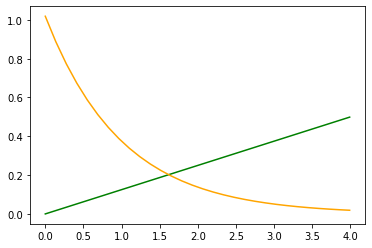

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(0,3.99,30)
y_hpdf = h_pdf(x)
y_gpdf = g_pdf(x)

plt.plot(x,y_hpdf,color="green")
plt.plot(x,y_gpdf,color="orange")
plt.show()


In [3]:
def f_func(x):
    return np.exp(-x)*2+1/20*x**3

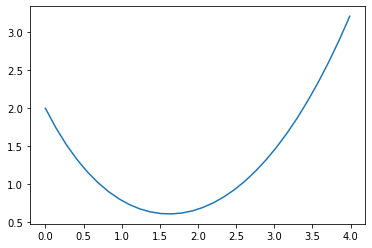

In [4]:
x = np.linspace(0,3.99,30)
y = f_func(x)
plt.plot(x,y)
plt.show()

In [5]:
def F(x):
    return -np.exp(-x)*2+1/80*x**4

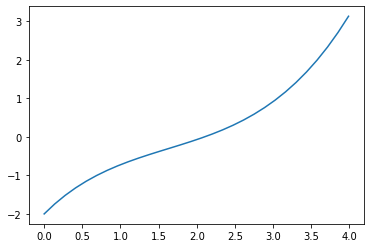

In [6]:
x = np.linspace(0,3.99,30)
y = F(x)
plt.plot(x,y)
plt.show()

In [7]:
def G_inv(x,l=1):
    return - 1/l * np.log(1-x*(1-np.exp(-l*4)))

def H_inv(x):
    return np.sqrt(x)*4

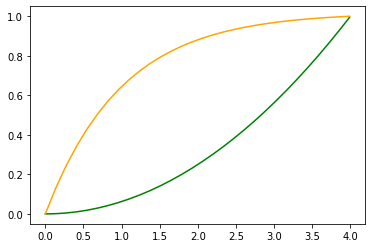

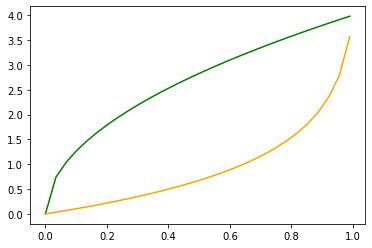

In [8]:
x = np.linspace(0,3.99,30)
y_H = H_CDF(x)
y_G = G_CDF(x)

plt.plot(x,y_H,color="green")
plt.plot(x,y_G,color="orange")
plt.show()

x = np.linspace(0,0.99,30)

y_H_inv = H_inv(x)
y_G_inv = G_inv(x)

plt.plot(x,y_H_inv,color="green")
plt.plot(x,y_G_inv,color="orange")
plt.show()

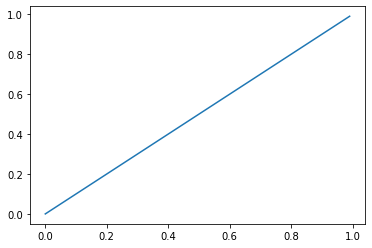

In [9]:
x = np.linspace(0,0.99,30)
y = H_CDF(H_inv(x))

plt.plot(x,y)
plt.show()

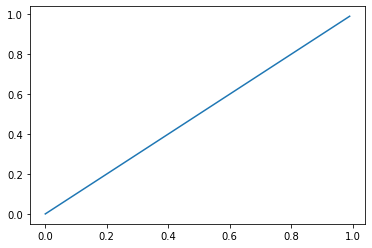

In [10]:
x = np.linspace(0,0.99,30)
y = G_CDF(G_inv(x))

plt.plot(x,y)
plt.show()

In [11]:
F(4)-F(0)

5.163368722222532

In [12]:
def monte_carlo(func,sample_count):
    samples = np.random.rand(sample_count)
    fs = []
    result = 0
    for sample in samples:
        x = sample
        f = func(x*4)
        result+=f
        fs.append(f)
    
    plt.scatter(samples*4,fs)
    plt.show()
    
    return result/sample_count*4

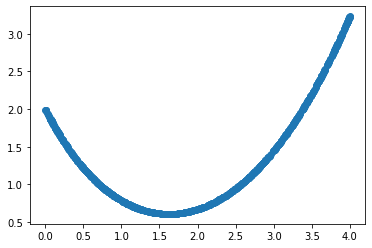

5.288032735528466

In [13]:
monte_carlo(f_func,1000)

In [14]:
def importance_sampling(func,pdf,sample_dist,sample_count,plot=True):
    samples = np.random.rand(sample_count)
    result = 0
    fs = []
    xs = []
    pdf_sum=0
    for sample in samples:
        x = sample_dist(sample)
        f = func(x)
        p = pdf(x)
        result += f/p
        
        pdf_sum+=p
        fs.append(f)
        xs.append(x)
    if(plot):
        plt.scatter(xs,fs)
        plt.show()
    return result/sample_count

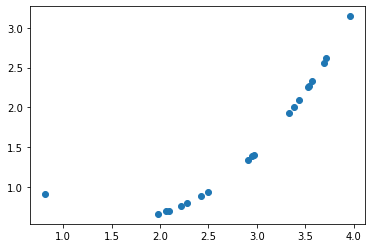

4.352166539025038

In [15]:
importance_sampling(f_func,h_pdf,H_inv,20)

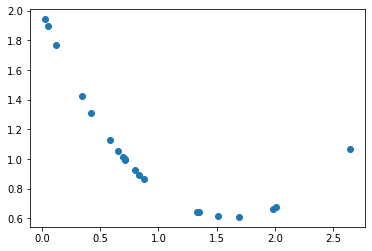

3.0560090141283682

In [16]:
importance_sampling(f_func,g_pdf,G_inv,20)

In [17]:

importance_sampling(lambda x: 1,lambda x: 1/4,lambda x: 4*x,100,plot=False)

4.0

In [18]:
def multiple_importance_sampling(n_1,n_2,func,w_1,w_2,
                                 pdf_1,pdf_2,
                                 sample_dist_1,sample_dist_2):
    """
    n_1, n_2 Anzahl der Samples von einer Distribution
    
    """
    
    result = 0
    
    for n,w,pdf,sample_dist in [[n_1,w_1,pdf_1,sample_dist_1],[n_2,w_2,pdf_2,sample_dist_2]]:
        samples = np.random.rand(n)
        sub_result = 0
        for sample in samples:
            x = sample_dist(sample)
            p = pdf(x)
            f = func(x)
            sub_result+=f/p*w(x)
            
        result += sub_result/n
    return result

In [21]:
n_1 = 10
n_2 = 10
p_1 = h_pdf
p_2 = g_pdf

c_1 = n_1 / (n_1+n_2)
c_2 = n_2 / (n_1+n_2)

w_1 = lambda x: c_1*p_1(x) / (c_1*p_1(x)+c_2*p_2(x))
w_2 = lambda x: c_2*p_2(x) / (c_1*p_1(x)+c_2*p_2(x))

multiple_importance_sampling(n_1,n_2,f_func,w_1,w_2,p_1,p_2,H_inv,G_inv)

5.247290107216712